In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Advertising.csv",index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [4]:
import statsmodels.api as sm
X= sm.add_constant(X)

In [5]:
X.head()

,const,TV,radio,newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4


In [6]:
model =sm.OLS(y,X).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        19:38:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
X.corr()

,const,TV,radio,newspaper
const,NaN,NaN,NaN,NaN
TV,NaN,1.000000,0.054809,0.056648
radio,NaN,0.054809,1.000000,0.354104
newspaper,NaN,0.056648,0.354104,1.000000


In [10]:
### Muilticollinearity example
df1 = pd.read_csv("data/Salary_Data.csv")
df1.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [13]:
X1= df1.iloc[:,:-1]
y1= df1.iloc[:,-1]
X1= sm.add_constant(X1)
model1 =sm.OLS(y1,X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.35e-19
Time:                        19:41:46   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
YearsExperience  6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
Age              1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X1.corr()

,const,YearsExperience,Age
const,NaN,NaN,NaN
YearsExperience,NaN,1.000000,0.987258
Age,NaN,0.987258,1.000000


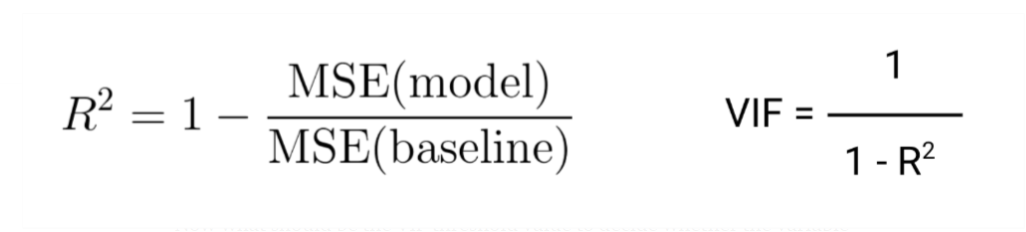

we also use VIF value to check for multicollinearity